In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from statistics import median
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

D:\Programmes\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
seg = io.imread("Img/Segmentation_4_r=6,5.tif", plugin ="tifffile")
seg = np.invert(seg)

In [3]:
np.shape(seg)

(60, 1484, 8400)

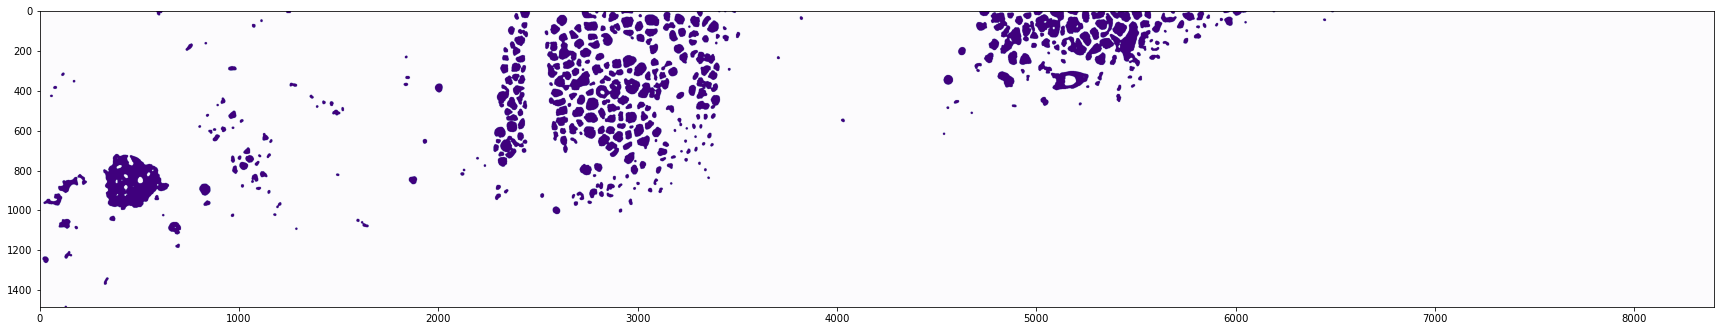

In [4]:
plt.figure(figsize=(30,10))
plt.imshow(seg[40,:,:], cmap = "Purples")
plt.show()

In [5]:
label_seg = label(seg)
regions_seg = regionprops(label_seg)

In [6]:
len(regions_seg)

2970

In [7]:
# Get Properties

n = len(regions_seg)
x_fascia = 4000

regions_l = []
regions_r = []

x_c_l = []
y_c_l = []
z_c_l = []

x_c_r = []
y_c_r = []
z_c_r = []

# Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions_seg:

    # Getting the centroids
    
    z0, y0, x0 = props.centroid
    
    cond = x0 < x_fascia
    if (cond):
        regions_l.append(props)
        x_c_l.append(x0)
        y_c_l.append(y0)
        z_c_l.append(z0)
        
    else:
        regions_r.append(props)
        x_c_r.append(x0)
        y_c_r.append(y0)
        z_c_r.append(z0)
        
areas_l = []
moments_l = []

# Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    m = props.moments
    moments_l.append(m)
    
areas_r = []
moments_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    m = props.moments
    moments_r.append(m)

In [9]:
#### Formating Data

Dict_l = {"X_Centroid": x_c_l, "Y_Centroid": y_c_l, "Z_Centroid" : z_c_l, "Area": areas_l}
          #, "Moments" : moments_l}
df_l = pd.DataFrame(Dict_l)

Dict_r = {"X_Centroid": x_c_r, "Y_Centroid": y_c_r, "Z_Centroid" : z_c_r, "Area": areas_r}
        #, "Moments" : moments_r}
df_r = pd.DataFrame(Dict_r)

df = pd.concat([df_l, df_r], keys = ['Left', 'Right'])
df

X_Centroid  Y_Centroid  Z_Centroid  Area
Left  0     2330.407315    5.188695    1.428096  1203
      1     2067.265618   46.970384    4.866728  2161
      2     1615.275967   53.341141    1.664969   982
      3     1627.704377   71.642903    4.681043  6214
      4     2052.792139   91.462585    2.841270  1323
...                 ...         ...         ...   ...
Right 1586  4906.690926  340.262760   43.900756  1058
      1587  4681.381250  265.381250   44.000000   160
      1588  4946.000000  351.000000   44.000000   137
      1589  5098.334459    9.037162   46.000000   296
      1590  6033.500000    2.585366   52.000000    82

[2970 rows x 4 columns]

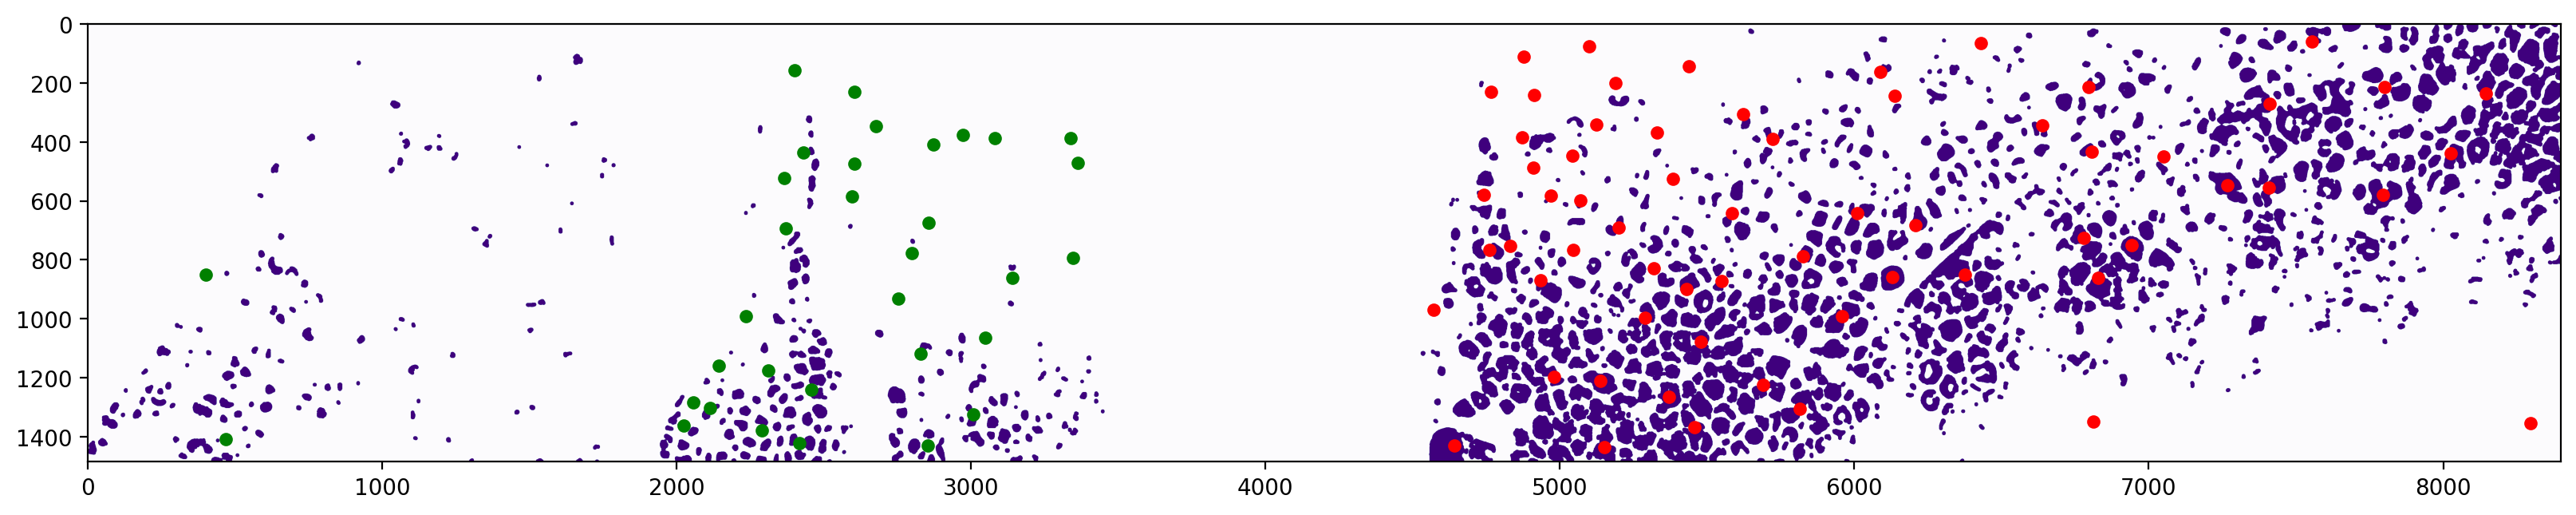

In [10]:
#### Clearing Data

# Locating large regions

large_x_c_r = df[df['Area'] > 6*1e4]["X_Centroid"].loc[["Right"]]
large_y_c_r = df[df['Area'] > 6*1e4]["Y_Centroid"].loc[["Right"]]

large_x_c_l = df[df['Area'] > 6*1e4]["X_Centroid"].loc[["Left"]]
large_y_c_l = df[df['Area'] > 6*1e4]["Y_Centroid"].loc[["Left"]]

# Ploting them

fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
fig.set(dpi = 200)
ax.imshow(seg[20,:,:], cmap = "Purples")

plt.plot(large_x_c_r, large_y_c_r, '.r', markersize = 10)
plt.plot(large_x_c_l, large_y_c_l, '.g', markersize = 10)

plt.show()

In [11]:
df = df[df['Area'] <= 6*1e4]

df

X_Centroid  Y_Centroid  Z_Centroid  Area
Left  0     2330.407315    5.188695    1.428096  1203
      1     2067.265618   46.970384    4.866728  2161
      2     1615.275967   53.341141    1.664969   982
      3     1627.704377   71.642903    4.681043  6214
      4     2052.792139   91.462585    2.841270  1323
...                 ...         ...         ...   ...
Right 1586  4906.690926  340.262760   43.900756  1058
      1587  4681.381250  265.381250   44.000000   160
      1588  4946.000000  351.000000   44.000000   137
      1589  5098.334459    9.037162   46.000000   296
      1590  6033.500000    2.585366   52.000000    82

[2874 rows x 4 columns]

In [20]:
df.loc['Left']

,X_Centroid,Y_Centroid,Z_Centroid,Area
0,2330.407315,5.188695,1.428096,1203
1,2067.265618,46.970384,4.866728,2161
2,1615.275967,53.341141,1.664969,982
3,1627.704377,71.642903,4.681043,6214
4,2052.792139,91.462585,2.841270,1323
...,...,...,...,...
1374,399.244565,192.244565,59.000000,184
1375,1697.000000,202.000000,59.000000,137
1376,522.954148,217.290393,59.000000,458
1377,311.000000,334.730000,59.000000,200


In [21]:
df.loc['Right']

,X_Centroid,Y_Centroid,Z_Centroid,Area
0,4878.000000,338.433260,0.949672,457
1,4803.525069,386.845216,2.297608,4348
2,8186.744385,932.374332,0.495187,935
3,7884.615686,1089.619608,0.444444,765
4,8385.445083,1096.907261,9.079799,12519
...,...,...,...,...
1586,4906.690926,340.262760,43.900756,1058
1587,4681.381250,265.381250,44.000000,160
1588,4946.000000,351.000000,44.000000,137
1589,5098.334459,9.037162,46.000000,296


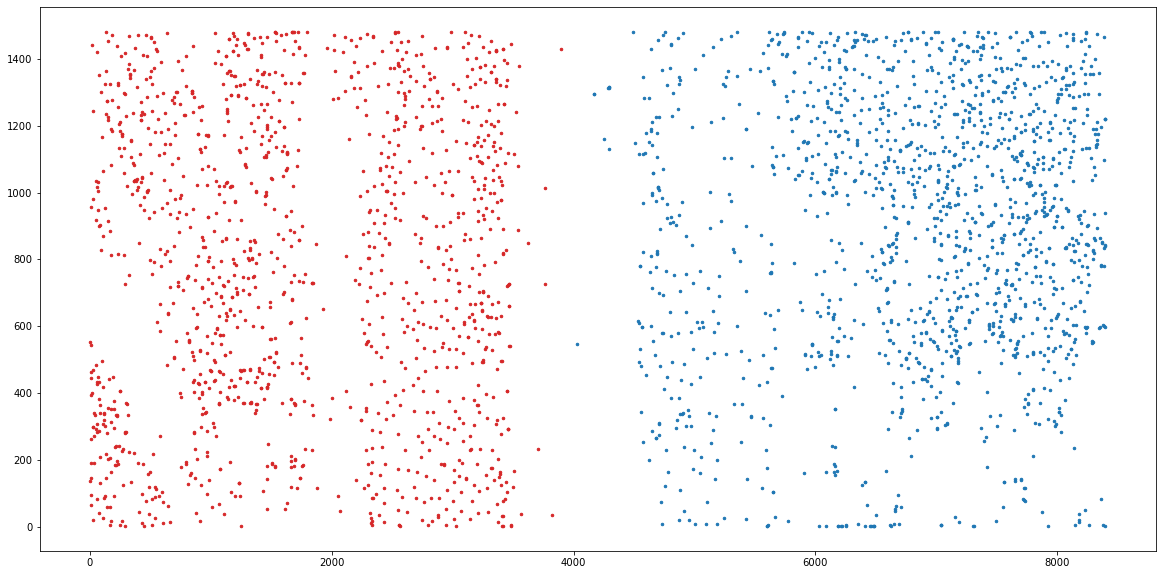

In [23]:
fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
#ax.imshow(seg[30,:,:], )

plt.plot(x_c_r,y_c_r, '.', color = "tab:blue", markersize = 5)
plt.plot(x_c_l,y_c_l, '.', color = "tab:red", markersize = 5)
plt.show()

In [13]:
# Afficher les quantiles

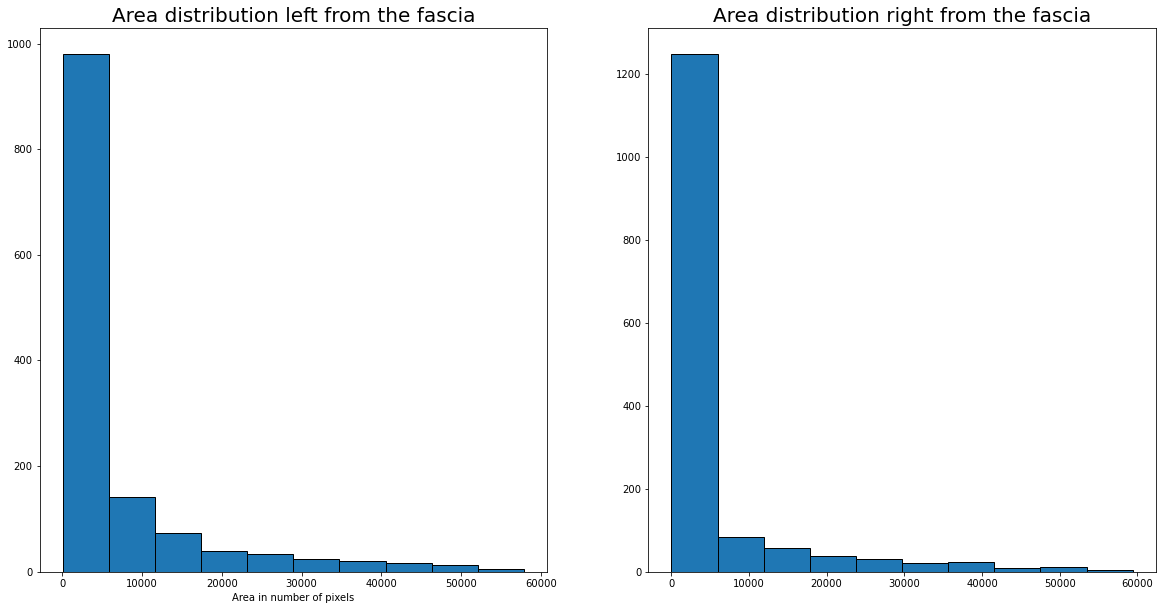

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(df.loc[["Left"]]["Area"], color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(df.loc[["Right"]]["Area"], color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)

plt.show()

In [15]:
def Average(lst):
    return sum(lst)/len(lst)

In [16]:
Area_Average_l = Average(df.loc[["Left"]]["Area"])
Area_Median_l = median(df.loc[["Left"]]["Area"])

Area_Average_r = Average(df.loc[["Right"]]["Area"])
Area_Median_r = median(df.loc[["Right"]]["Area"])

print("Aire moyenne des régions à gauche du fascia :", Area_Average_l)
print("Aire moyenne des régions à droite du fascia :", Area_Average_r)

print("\nAire médiane des régions à gauche du fascia :", Area_Median_l)
print("Aire médiane des régions à droite du fascia :", Area_Median_r)

Aire moyenne des régions à gauche du fascia : 6050.112927191679
Aire moyenne des régions à droite du fascia : 4736.848167539267

Aire médiane des régions à gauche du fascia : 1215.0
Aire médiane des régions à droite du fascia : 698.5


In [19]:
stat_MWU, p_MWU = mannwhitneyu(df.loc[["Left"]]["Area"], df.loc[["Right"]]["Area"])

print("Valeur du test de Mann-Whitney d'égalité des distributions :\n", stat_MWU)
print("P-valeur du test de Mann-Whitney d'égalité des distributions :\n", p_MWU)

Valeur du test de Mann-Whitney d'égalité des distributions :
 884268.0
P-valeur du test de Mann-Whitney d'égalité des distributions :
 4.257239757371492e-11


## Pistes de continuation :
Regression pour savoir quels paramètres sont importants

Expliquer gauche/droite (classification)

Si la majorité est circulaire, enlever celles qui ne le sont pas

convex_area

Enveloppe convexe pour les trous (scikit image binary fill holes)

ilastik : traitement par batch pour éviter le problème de mémoire et d'optimisation de

read .czi chunck by chunck

densité de cellules